In [31]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',500)
data = pd.read_csv('insurance_claims.csv')

In [32]:
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,2015-01-25,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,2015-01-21,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,2015-01-10,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,2015-02-17,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [33]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [34]:
#removing _c39 columns since it's all null
data.pop('_c39')

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: _c39, Length: 1000, dtype: float64

in some of the feature our columns are filled with '?' so replacing  with  nan

In [35]:
data=data.replace('?',np.nan)

# droping some of the unwanted features

In [36]:
cols_to_drop=['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date','incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year']

In [37]:
data.drop(columns=cols_to_drop,inplace=True)

In [38]:
#getting the null feture count
feature_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0]
data[feature_with_nan].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   collision_type           822 non-null    object
 1   property_damage          640 non-null    object
 2   police_report_available  657 non-null    object
dtypes: object(3)
memory usage: 23.6+ KB


these above feature has nulll data of object type

In [39]:
#counting the null present
for feature in feature_with_nan:
    print(' {} sum of null:{}'.format(feature,data[feature].isnull().sum()))

 collision_type sum of null:178
 property_damage sum of null:360
 police_report_available sum of null:343


In [40]:
#lets see the unique
for feature in feature_with_nan:
    print('{} {}'.format(feature, data[feature].unique()))

collision_type ['Side Collision' nan 'Rear Collision' 'Front Collision']
property_damage ['YES' nan 'NO']
police_report_available ['YES' nan 'NO']


In [41]:
#using the categorical imputer to fill missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")

In [42]:
data['collision_type']=imputer.fit_transform(data['collision_type'].values.reshape(-1,1))[:,0]
data['property_damage']=imputer.fit_transform(data['property_damage'].values.reshape(-1,1))[:,0]
data['police_report_available']=imputer.fit_transform(data['police_report_available'].values.reshape(-1,1))[:,0]

In [43]:
feature_with_nan = [feature for feature in data.columns if data[feature].isnull().sum()>0]
feature_with_nan

[]

In [44]:
#obtaning categorical columns
categorical_data = data.select_dtypes(include=['object']).copy()
categorical_data.head()

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N


In [45]:
#lets check the uniqueness
for feature in categorical_data:
    print('{} {}'.format(feature,data[feature].unique()))

policy_csl ['250/500' '100/300' '500/1000']
insured_sex ['MALE' 'FEMALE']
insured_education_level ['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']
insured_occupation ['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']
insured_relationship ['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']
incident_type ['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']
collision_type ['Side Collision' 'Rear Collision' 'Front Collision']
incident_severity ['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']
authorities_contacted ['Police' 'None' 'Fire' 'Other' 'Ambulance']
property_damage ['YES' 'NO']
police_report_available ['YES' 'NO']
fraud_reported ['Y' 'N']


In [46]:
#here policy_csl,insured_education_level,incident_severity are ordinal variable
#so providing the custom encoding to ordinal variable and nominal variable
categorical_data['policy_csl'] = categorical_data['policy_csl'].map({'100/300' : 1.3, '250/500' : 2.5 ,'500/1000':5})
categorical_data['insured_education_level'] = categorical_data['insured_education_level'].map({'JD' : 1, 'High School' : 2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
categorical_data['incident_severity'] = categorical_data['incident_severity'].map({'Trivial Damage' : 1, 'Minor Damage' : 2,'Major Damage':3,'Total Loss':4})
categorical_data['property_damage'] = categorical_data['property_damage'].map({'NO' : 0, 'YES' : 1})
categorical_data['police_report_available'] = categorical_data['police_report_available'].map({'NO' : 0, 'YES' : 1})
categorical_data['fraud_reported'] = categorical_data['fraud_reported'].map({'N' : 0, 'Y' : 1})
categorical_data['insured_sex'] = categorical_data['insured_sex'].map({'FEMALE' : 0, 'MALE' : 1})

In [47]:
column = ['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']
for feature in categorical_data:
    if feature not in column:
        print(feature)

insured_occupation
insured_relationship
incident_type
collision_type
authorities_contacted


In [48]:
#using get dummies for encoding remaining features
for col in categorical_data.drop(columns=['policy_csl','insured_education_level','incident_severity','insured_sex','property_damage','police_report_available','fraud_reported']).columns:
    categorical_data= pd.get_dummies(categorical_data, columns=[col], prefix = [col], drop_first=True)

In [49]:
categorical_data.head()

,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,1.3,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [50]:
categorical_data.dtypes

policy_csl                                float64
insured_sex                                 int64
insured_education_level                     int64
incident_severity                           int64
property_damage                             int64
police_report_available                     int64
fraud_reported                              int64
insured_occupation_armed-forces             uint8
insured_occupation_craft-repair             uint8
insured_occupation_exec-managerial          uint8
insured_occupation_farming-fishing          uint8
insured_occupation_handlers-cleaners        uint8
insured_occupation_machine-op-inspct        uint8
insured_occupation_other-service            uint8
insured_occupation_priv-house-serv          uint8
insured_occupation_prof-specialty           uint8
insured_occupation_protective-serv          uint8
insured_occupation_sales                    uint8
insured_occupation_tech-support             uint8
insured_occupation_transport-moving         uint8


(array([349.,   0.,   0., 351.,   0.,   0.,   0.,   0.,   0., 300.]),
 array([1.3 , 1.67, 2.04, 2.41, 2.78, 3.15, 3.52, 3.89, 4.26, 4.63, 5.  ]),
 <a list of 10 Patch objects>)

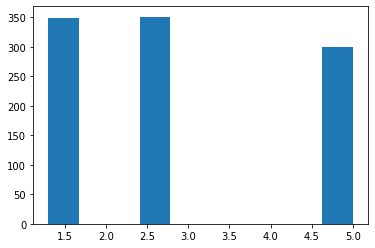

In [54]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.hist(categorical_data['policy_csl'])

policy_csl fallows the uniform distribution

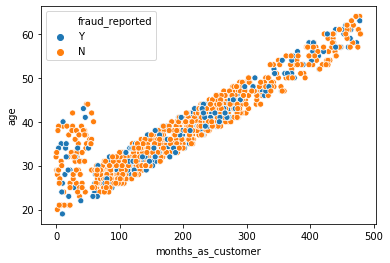

In [55]:
#lets see which  range of customer are doing fraudlation
sns.scatterplot(data['months_as_customer'],data['age'], hue=data['fraud_reported'] )

younger customer between 20 to 40 are comparetively more involved in fraudlation

In [56]:
#obtainig numerical data 
numerical_data = data.select_dtypes(exclude=['object']).copy()
numerical_data.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim',
       'vehicle_claim'],
      dtype='object')

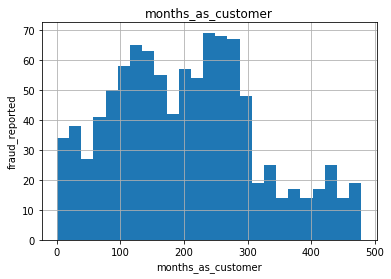

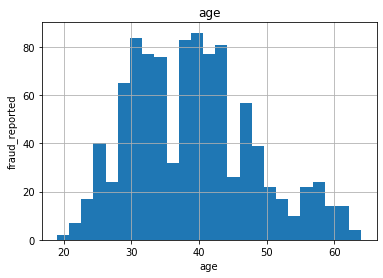

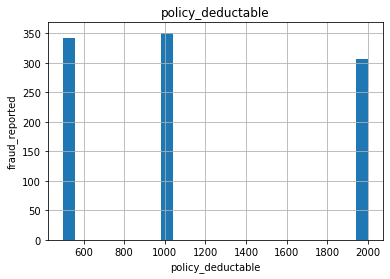

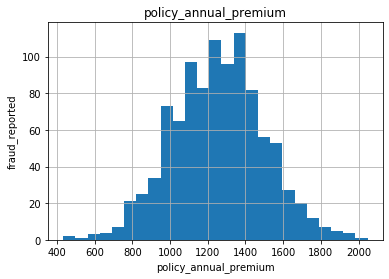

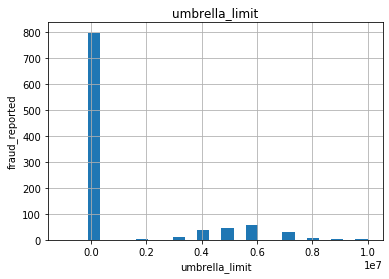

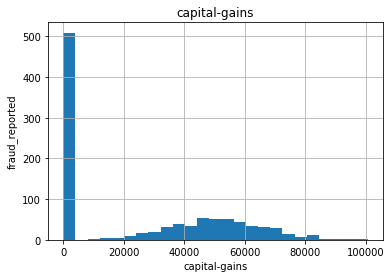

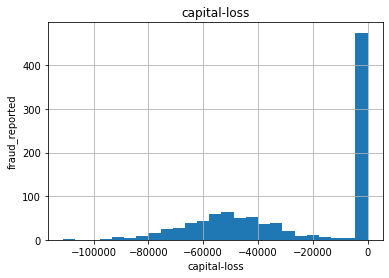

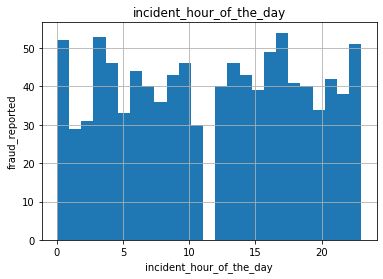

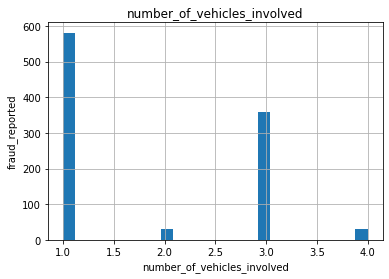

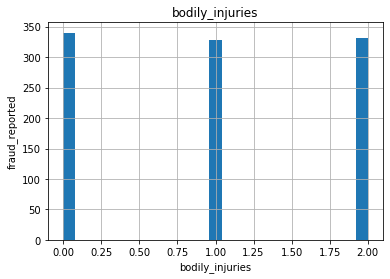

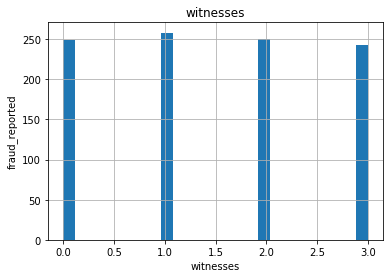

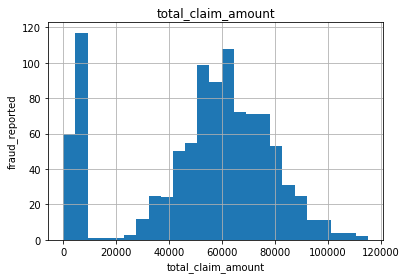

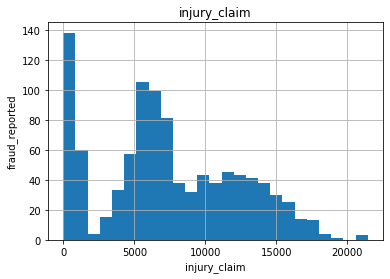

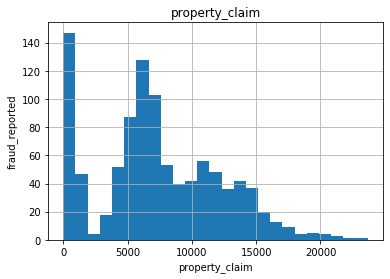

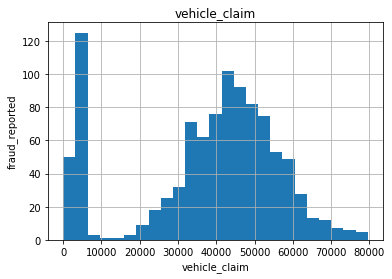

In [57]:
#plotting the graph for numerical data
import matplotlib.pyplot as plt
import seaborn as sns

for feature in numerical_data:
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("fraud_reported")
    plt.title(feature)
    plt.show()

graph fallows the gaussian distribution, uniform distribution and exponential distribution

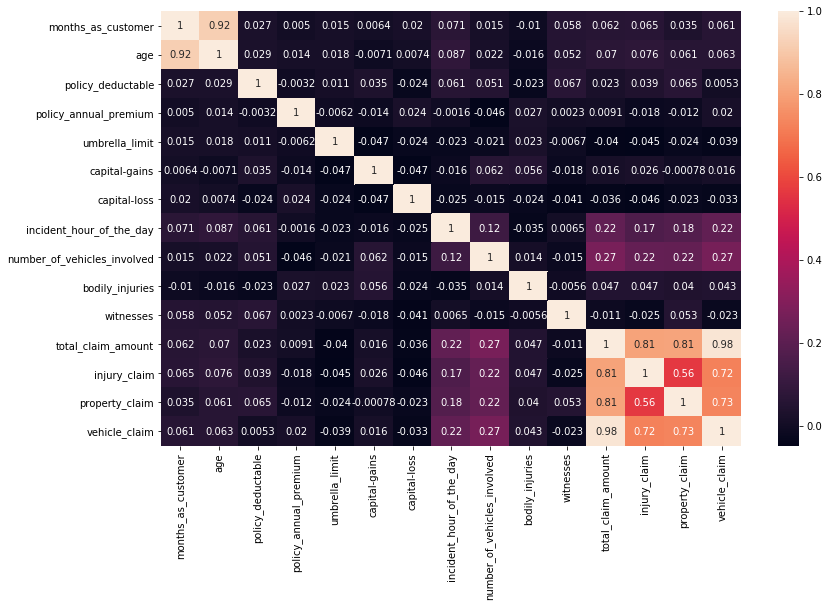

In [58]:
#lets check the correlation of numerical_data
plt.figure(figsize=(13,8))
sns.heatmap(numerical_data.corr(), annot=True )

since the correlation of total_claim_amount and age is related so we can drop it but before let's perform scaling 

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(numerical_data)
scaled_num_df= pd.DataFrame(data=scaled_data, columns=numerical_data.columns,index=data.index)
scaled_num_df.shape

(1000, 15)

In [61]:
scaled_num_df.isna().sum()

months_as_customer             0
age                            0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
capital-gains                  0
capital-loss                   0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
bodily_injuries                0
witnesses                      0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
dtype: int64

In [62]:
scaled_num_df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252


In [63]:
#lets join the scaled_num_df and categorical data
df=pd.concat([scaled_num_df,categorical_data], axis=1)

In [64]:
df.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,fraud_reported,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,1.078140,0.990836,-0.222383,0.616705,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,0.714257,-0.189283,1.165505,0.749653,2.5,1,6,3,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
1,0.208995,0.334073,1.412784,-0.242521,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.807312,-1.363822,-1.372696,-1.823346,2.5,1,6,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,-0.608002,-1.088913,1.412784,0.642233,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,-0.686362,0.054644,-0.736072,-0.785565,1.3,0,7,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0.452355,0.224613,1.412784,0.652886,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,0.403135,-0.224130,-0.219722,0.677607,2.5,0,7,3,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1
4,0.208995,0.552994,-0.222383,1.341980,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.753121,-1.257232,-1.399654,-1.768252,5.0,1,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0


In [65]:
#lets grop the highly correlated feature
df.drop(columns=['age','total_claim_amount'], inplace=True)

In [66]:
#spliting X and y feature
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [67]:
#taking train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, random_state=100 )

In [68]:
x_train.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
786,-1.033883,1.412784,-0.337094,-0.479476,0.907232,-1.235538,0.339095,2.122017,-1.210174,-1.338700,0.677785,-0.420871,0.266520,5.0,1,3,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0
152,-0.868745,-1.039966,-0.403106,-0.479476,0.243156,-0.633901,1.634452,1.140056,0.009759,1.362107,0.481003,0.493628,0.322144,2.5,1,2,4,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
925,0.634876,1.412784,-0.323039,-0.479476,-0.901927,-1.377937,-1.100189,-0.823865,1.229693,1.362107,-1.435565,-1.356106,-1.872613,2.5,0,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1
501,-1.546678,-0.222383,-1.989984,-0.479476,-0.901927,-0.957859,-1.675903,-0.823865,-1.210174,0.461838,0.517900,-0.501745,-0.162578,2.5,1,4,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
920,0.087314,-0.222383,1.604595,-0.479476,1.169273,-0.594741,0.770881,-0.823865,0.009759,-1.338700,0.124337,-0.700819,-0.305610,1.3,1,1,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [70]:
x_test.head()

,months_as_customer,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,property_claim,vehicle_claim,policy_csl,insured_sex,insured_education_level,incident_severity,property_damage,police_report_available,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Rear Collision,collision_type_Side Collision,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
249,-0.955660,1.412784,-0.945997,-0.479476,-0.901927,-0.918699,1.058738,-0.823865,0.009759,1.362107,-0.209781,-0.205206,0.707273,2.5,0,2,3,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0
353,2.355783,-1.039966,-0.163274,-0.479476,1.517464,-2.008053,1.202666,-0.823865,-1.210174,0.461838,-0.191333,1.161358,1.089753,1.3,1,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
537,2.051582,-1.039966,0.078731,-0.479476,-0.901927,-1.046859,0.914809,1.140056,1.229693,-0.438431,-0.265126,-0.261196,0.592847,2.5,0,5,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
424,-0.468938,-0.222383,0.401949,-0.479476,0.993383,0.953851,-0.812332,1.140056,-1.210174,1.362107,-0.195433,1.153063,0.393660,5.0,1,4,3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
564,-0.208195,1.412784,-1.028236,-0.479476,1.183631,-0.790540,0.051239,2.122017,1.229693,1.362107,0.841769,-0.337923,0.130374,5.0,0,1,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [71]:
#implementing of model
##using svm
from sklearn.svm import SVC
sv_classifier=SVC()

In [72]:
y_pred = sv_classifier.fit(x_train, y_train).predict(x_test)

In [73]:
#checking the accuracy score
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
print(score)

0.756


In [74]:
#using gridsearchCV for parameter
from sklearn.model_selection import GridSearchCV

In [75]:
param_grid = {"kernel": ['rbf','sigmoid'],
             "C":[0.1,0.5,1.0,0.6,0.8],
             "random_state":[0,100,200,300,400]}

In [76]:
newgrid = GridSearchCV(estimator=sv_classifier, param_grid=param_grid, cv=5,  verbose=3)

In [78]:
newgrid.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=0 ...............................
[CV] ... C=0.1, kernel=rbf, random_state=0, score=0.747, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, k

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] . C=0.1, kernel=rbf, random_state=100, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=100 .............................
[CV] . C=0.1, kernel=rbf, random_state=100, score=0.747, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] . C=0.1, kernel=rbf, random_state=200, score=0.753, total=   0.0s
[CV] C=0.1, kernel=rbf, random_state=200 .............................
[CV] .

[CV] . C=0.5, kernel=rbf, random_state=300, score=0.747, total=   0.0s
[CV] C=0.5, kernel=rbf, random_state=400 .............................
[CV] . C=0.5, kernel=rbf, random_state=400, score=0.753, total=   0.0s
[CV] C=0.5, kernel=rbf, random_state=400 .............................
[CV] . C=0.5, kernel=rbf, random_state=400, score=0.753, total=   0.0s
[CV] C=0.5, kernel=rbf, random_state=400 .............................
[CV] . C=0.5, kernel=rbf, random_state=400, score=0.753, total=   0.0s
[CV] C=0.5, kernel=rbf, random_state=400 .............................
[CV] . C=0.5, kernel=rbf, random_state=400, score=0.753, total=   0.0s
[CV] C=0.5, kernel=rbf, random_state=400 .............................
[CV] . C=0.5, kernel=rbf, random_state=400, score=0.747, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=0 ...........................
[CV]  C=0.5, kernel=sigmoid, random_state=0, score=0.753, total=   0.0s
[CV] C=0.5, kernel=sigmoid, random_state=0 ...........................
[CV] 

[CV]  C=1.0, kernel=sigmoid, random_state=100, score=0.740, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=100 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=100, score=0.747, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=100 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=100, score=0.740, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=200 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=200, score=0.753, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=200 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=200, score=0.753, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=200 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=200, score=0.740, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=200 .........................
[CV]  C=1.0, kernel=sigmoid, random_state=200, score=0.747, total=   0.0s
[CV] C=1.0, kernel=sigmoid, random_state=200 ...........

[CV]  C=0.6, kernel=sigmoid, random_state=300, score=0.747, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=300 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=300, score=0.747, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=400 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=400, score=0.753, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=400 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=400, score=0.753, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=400 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=400, score=0.753, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=400 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=400, score=0.747, total=   0.0s
[CV] C=0.6, kernel=sigmoid, random_state=400 .........................
[CV]  C=0.6, kernel=sigmoid, random_state=400, score=0.747, total=   0.0s
[CV] C=0.8, kernel=rbf, random_state=0 .................

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    6.2s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1.0, 0.6, 0.8],
                         'kernel': ['rbf', 'sigmoid'],
                         'random_state': [0, 100, 200, 300, 400]},
             verbose=3)

In [79]:
print(newgrid.best_estimator_) 

SVC(C=0.1, random_state=0)


In [81]:
grid_predictions = newgrid.predict(x_test) 

In [83]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       189
           1       0.00      0.00      0.00        61

    accuracy                           0.76       250
   macro avg       0.38      0.50      0.43       250
weighted avg       0.57      0.76      0.65       250



/root/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting = GradientBoostingClassifier(max_depth =5,learning_rate = 1.0)
y_pred = gradient_boosting.fit(x_train, y_train).predict(x_test)
ac2=accuracy_score(y_pred.round(),y_test)
print(ac2)

0.748


we get 74% accuracy without hyperparamter tuning

In [85]:
parameter = {"learning_rate":[0.1,0.5,0.75,1.0],
             "n_estimators":[100,200,150,250],
             "max_depth":[3,5,6,7]} 

In [86]:
tunning = GridSearchCV(estimator = GradientBoostingClassifier(),param_grid = parameter, cv=5, scoring = 'r2', verbose=3,n_jobs=-1)

In [87]:
tunning.fit(x_train,y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.5, 0.75, 1.0],
                         'max_depth': [3, 5, 6, 7],
                         'n_estimators': [100, 200, 150, 250]},
             scoring='r2', verbose=3)

In [88]:
tunning.best_estimator_

GradientBoostingClassifier(max_depth=6, n_estimators=200)

In [90]:
tunning_prediction = tunning.predict(x_test) 

In [91]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, tunning_prediction)) 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       189
           1       0.44      0.38      0.41        61

    accuracy                           0.73       250
   macro avg       0.63      0.61      0.62       250
weighted avg       0.72      0.73      0.72       250



In [92]:
from xgboost import XGBClassifier

In [93]:
xgb=XGBClassifier()
y_pred = xgb.fit(x_train, y_train).predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.756

In [94]:
param_grid = {"n_estimators": [10, 50, 100, 130], "criterion": ['gini', 'entropy'],
                               "max_depth": range(2, 10, 1)}

            #Creating an object of the Grid Search class
grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,  verbose=3,n_jobs=-1)

In [95]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    9.4s


[11:20:32] WARNING: ../src/learner.cc:516: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:   12.4s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=0,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [96]:
grid.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [97]:
grid_prediction = grid.predict(x_test) 

In [98]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, grid_prediction)) 

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       189
           1       0.52      0.44      0.48        61

    accuracy                           0.76       250
   macro avg       0.67      0.66      0.66       250
weighted avg       0.75      0.76      0.76       250



In [101]:
xgb=XGBClassifier(n_estimators = 10, max_depth=3)
y_pred = xgb.fit(x_train, y_train).predict(x_test)
ac2=accuracy_score(y_test,y_pred)
ac2

0.764

In [102]:
import pickle
# Save the Modle to file in the current working directory

Pkl_Filename = "xgboost.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(y_pred, file)
